<a href="https://colab.research.google.com/github/NadilaAmaliaaa/MACHINE_LEARNING/blob/main/Jobsheet%209%20-%20Perceptron%20dan%20ANN/ML_Tugas_JS9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama: Nadila Amalia Pribadi
### Kelas: TI-3F / 19
### NIM: 2241720114

## Tugas Jobsheet 9 Machine Learning

### Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow

from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

### Menyiapkan Dataset MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

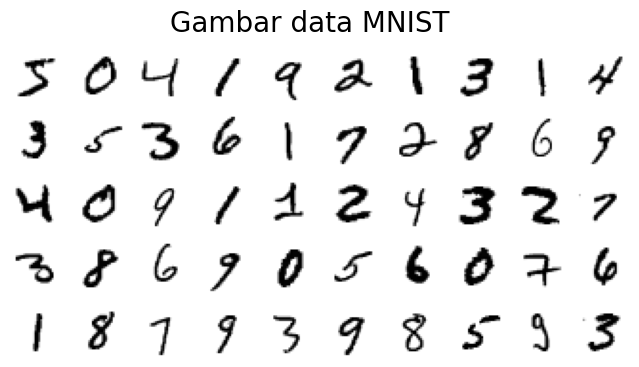

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize=(8,4), subplot_kw={'xticks': [], 'yticks': []})
for row in range(0,5):
    for col in range(0,10):
        myid = (10*row) + col # (ncols*rows) + cols

        ax[row,col].imshow( x_train[myid], cmap=plt.cm.binary ) # W,H,C
        ax[row,col].axis('off')

plt.suptitle("Gambar data MNIST", size=20, color="#000000")

plt.show()

### Informasi Dataset

In [ ]:
print("bentuk data: ",x_train.shape)
print("nilai max data: ",x_train[0].max())

bentuk data:  (60000, 28, 28)
nilai max data:  255


### Praproses dan Normalisasi Data

In [ ]:
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32')/255

print("hasil: ",x_train.shape)
print("nilai max data: ",x_train[0].max())

hasil:  (60000, 784)
nilai max data:  1.0


### Pemodelan ANN

In [ ]:
# ubah bentuk label menjadi kategorical untuk digunakan tensorflow nantinya
y_train = tensorflow.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test , num_classes=10)

In [ ]:
# pembuatan hidden layer
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,MaxPool2D,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Concatenate,UpSampling2D
from tensorflow.keras.models import Model

nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(10, activation='softmax'))
print(nn_model)

<Sequential name=sequential_3, built=True>


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = nn_model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7738 - loss: 0.7454
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9036 - loss: 0.3249
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9150 - loss: 0.2838
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9235 - loss: 0.2537
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9268 - loss: 0.2404
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9301 - loss: 0.2316
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9311 - loss: 0.2171
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9349 - loss: 0.2082
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9372 - loss: 0.2053
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9380 - loss: 0.1967
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9390 - loss: 0.1919
Epoch 12/50
1875/1875 ━━━━━━━━

### Evaluasi

Akurasi terbaik: 0.9522333145141602 pada epoch: 50


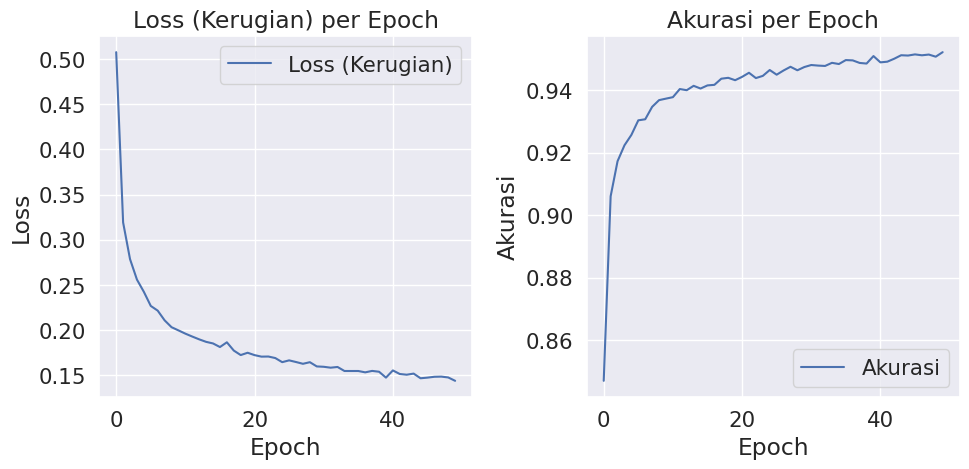

In [ ]:
#Akurasi terbaik
best_accuracy = max(history.history['accuracy'])
best_epoch = history.history['accuracy'].index(best_accuracy) + 1
print("Akurasi terbaik:", best_accuracy, "pada epoch:", best_epoch)

# Visualisasi loss (kerugian)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss (Kerugian)')
plt.title('Loss (Kerugian) per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Visualisasi akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Akurasi')
plt.title('Akurasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Menghitung akurasi model pada data pengujian menggunakan prediksi yang dihasilkan sebelumnya
from sklearn.metrics import accuracy_score
y_prob = nn_model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy_score(y_test,y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.9653

### Confussion Matrix

<Axes: >

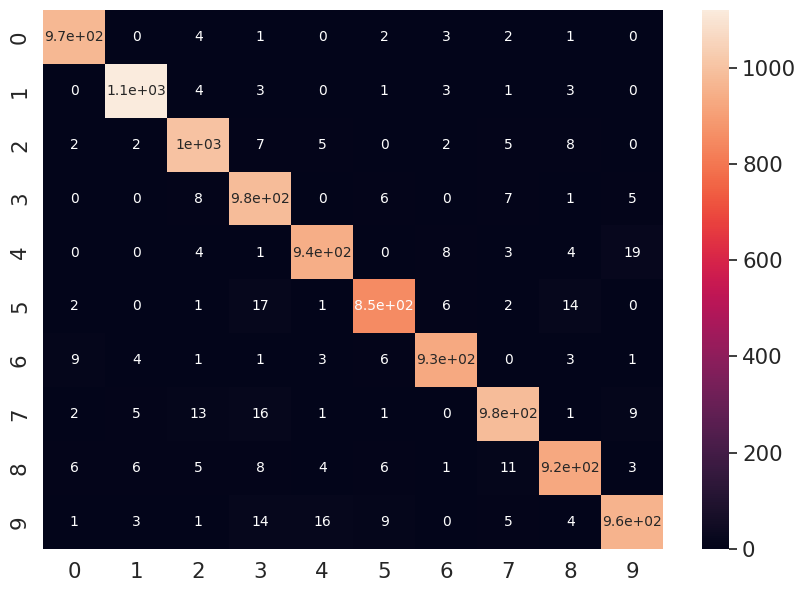

In [ ]:
from sklearn.metrics import confusion_matrix  # for evaluating results
import seaborn as sn

confusion_array = confusion_matrix(y_true = y_test,y_pred = y_pred)
df_cm = pd.DataFrame(confusion_array, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10})